This notebook uses the venv as kernel.

# What is EDA?
 Exploratory Data Analysis: unavoidable and one of the major step to fine-tune the given dataset in a different form of analysis to understand the insights of the key characteristics of various entities of the data set like columns, rows by applying Pandas, NumPy, Statistical Methods, and Data visualization packages.

# ML process flow

<img src='images/39379ML-flow.png' width="1200"/>

<img src='images/24537Zoom-EDA.png' width="1200"/>

In [8]:
# to get Jupyter display all the variables values, not only the last one (without having to use print)
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
import statsmodels as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.metrics import r2_score,mean_squared_error
from sklearn import preprocessing


# Data Collection

In [21]:
# Let's use the Automobile – Predictive Analysis dataset
# https://www.kaggle.com/datasets/uciml/autompg-dataset/kaggle.json
df_cars = pd.read_csv('data/auto-mpg.csv', sep=',', header=0, on_bad_lines='error')
df_cars.head()
df_cars.info()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


# Data Cleaning, type conversion

In [11]:
df_cars.horsepower = df_cars.horsepower.str.replace('?','NaN').astype(float)
df_cars.horsepower.fillna(df_cars.horsepower.mean(),inplace=True)
df_cars.horsepower = df_cars.horsepower.astype(int)
df_cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    int64  
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(5), object(1)
memory usage: 28.1+ KB


In [12]:
df_cars['brand'] = df_cars['car name'].str.split(' ', expand=False).map(lambda l: l[0])
df_cars['name'] = df_cars['car name'].str.split(' ', expand=False).map(lambda l: ' '.join(l[1:]))
df_cars.drop(['car name'], axis=1, inplace=True)  # drop the original column since it's become redundant
df_cars.columns
df_cars.head()

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin', 'brand', 'name'],
      dtype='object')

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,brand,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet,chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick,skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth,satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc,rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford,torino


In [53]:
df_cars['brand'].value_counts().sort_index()
print("There are misspelled brands")
print("One 'brand' (hi) is suspicious")

brand
amc              28
audi              7
bmw               2
buick            17
cadillac          2
capri             1
chevroelt         1
chevrolet        43
chevy             3
chrysler          6
datsun           23
dodge            28
fiat              8
ford             51
hi                1
honda            13
maxda             2
mazda            10
mercedes          1
mercedes-benz     2
mercury          11
nissan            1
oldsmobile       10
opel              4
peugeot           8
plymouth         31
pontiac          16
renault           5
saab              4
subaru            4
toyota           25
toyouta           1
triumph           1
vokswagen         1
volkswagen       15
volvo             6
vw                6
Name: count, dtype: int64

There are misspelled brands
One 'brand' (hi) is suspicious


In [13]:
# Correct the misspelled brand names (there are none, but let's pretend)
df_cars['brand'] = df_cars['brand'].str.replace('chevroelt|chevrolet|chevy','chevrolet')
df_cars['brand'] = df_cars['brand'].str.replace('maxda|mazda','mazda')
df_cars['brand'] = df_cars['brand'].str.replace('mercedes|mercedes-benz|mercedes benz','mercedes')
df_cars['brand'] = df_cars['brand'].str.replace('toyota|toyouta','toyota')
df_cars['brand'] = df_cars['brand'].str.replace('vokswagen|volkswagen|vw','volkswagen')

In [14]:
df_cars.reset_index(inplace=True)  # to make sure both 'brand' and 'name' and in the columns
df_cars[['brand','name']].value_counts().sort_index()
print("There are no more misspelled brands")

brand  name               
amc    ambassador brougham    1
       ambassador dpl         1
       ambassador sst         1
       concord                2
       concord d/l            1
                             ..
vw     dasher (diesel)        1
       pickup                 1
       rabbit                 2
       rabbit c (diesel)      1
       rabbit custom          1
Name: count, Length: 305, dtype: int64

There are no more misspelled brands


# Statistics

In [110]:
display(df_cars.describe().round(2))

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
count,398.00,398.00,398.00,398.00,398.00,398.00,398.00,398.00
mean,23.51,5.45,193.43,104.46,2970.42,15.57,76.01,1.57
std,7.82,1.70,104.27,38.20,846.84,2.76,3.70,0.80
min,9.00,3.00,68.00,46.00,1613.00,8.00,70.00,1.00
25%,17.50,4.00,104.25,76.00,2223.75,13.82,73.00,1.00
50%,23.00,4.00,148.50,95.00,2803.50,15.50,76.00,1.00
75%,29.00,8.00,262.00,125.00,3608.00,17.18,79.00,2.00
max,46.60,8.00,455.00,230.00,5140.00,24.80,82.00,3.00


# Missing values

In [15]:
# let's replace missing values of horsepower with mean value
meanhp = df_cars['horsepower'].mean()
df_cars['horsepower'] = df_cars['horsepower'].fillna(meanhp)

# Skewness and kurtosis
<div style='font-size:23px'>
Skewness and kurtosis are two key statistical concepts that help provide insights into the shape and characteristics of a dataset during EDA.

[Skewness](https://en.wikipedia.org/wiki/Skewness) is the 3rd moment, and measures the asymmetry of a probability distribution of a real-valued random variable about its mean. It can take positive or negative values.

- Positive skewness indicates that the tail on the right side (greater than the mean) of the distribution is longer or fatter than the left side.
- Negative skewness signifies that the tail on the left side (less than the mean) is longer or fatter than the right side.

If the data are highly skewed, certain statistical techniques may be less valid, and data transformations may be needed.

[Kurtosis](https://en.wikipedia.org/wiki/Kurtosis) gauges the "tailedness" of a probability distribution. In simple words, it's a measure of the heaviness of the tails of a distribution compared to a normal distribution.
The standard measure is a scaled version of the 4th moment of the distribution, which is related to the tails of the distribution, not its peak.  Higher kurtosis corresponds to greater extremity of deviations (or outliers), and not the configuration of data near the mean.

- High kurtosis (>3 for a normal distribution) means the distribution has heavier tails and a sharper peak, i.e., more outliers.
- Low kurtosis (<3 for a normal distribution) indicates lighter tails and a flatter peak, i.e., fewer outliers.

Kurtosis can indicate the presence of outliers. Extreme values can have a disproportionate influence on statistical results and can lead to incorrect conclusions if not handled properly.

Intuition: The 4th moment is E[ ((x-µ)/s)^4], so higher moments make the values close to the mean very small, and increase those far away.
</div>

In [16]:
print(f"Skewness: {df_cars['mpg'].skew():.3f}")
print(f"Kurtosis: {df_cars['mpg'].kurt(skipna=True):.3f}")  # Fisher’s formula, normalized by N-1

print("This is the EXCESS Kurtosis, ie the Kurtosis - 3")  # 3 is the kurtosis of the normal distribution (mesokurtic)

Skewness: 0.457
Kurtosis: -0.511
This is the EXCESS Kurtosis, ie the Kurtosis - 3


A negative excess kurtosis (platykurtic) means the distribution has lighter tails and a flatter peak than the normal distribution.
It means that more of the variance is due to frequent modest deviations, and not due to outliers.
A positive value is called leptokurtic, and means the distribution has heavier tails and a sharper peak than the normal distribution.

# Categorical variables

In [17]:
# We can replace categorical variable with actual names
df_cars['origin'] = df_cars['origin'].replace({1: 'america', 2: 'europe', 3: 'asia'})
df_cars.head()

,index,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,brand,name
0,0,18.0,8,307.0,130,3504,12.0,70,america,chevrolet,chevelle malibu
1,1,15.0,8,350.0,165,3693,11.5,70,america,buick,skylark 320
2,2,18.0,8,318.0,150,3436,11.0,70,america,plymouth,satellite
3,3,16.0,8,304.0,150,3433,12.0,70,america,amc,rebel sst
4,4,17.0,8,302.0,140,3449,10.5,70,america,ford,torino


# Create Dummy Variables

Values like ‘america’ cannot be inserted into an equation.
So we create 3 simple T/F columns with titles equivalent to “Is this car American?”, “Is this car European?” or “Is this car Asian?”.
These will be used as independent variables without imposing any kind of ordering between the three regions.
If we use 1/0 for T/F, this is called 'one-hot encoding'.

In [116]:
cData = pd.get_dummies(df_cars, columns=['origin'], prefix=[''])  # no prefix to shorten the column names
cData.head()

,brand,name,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,_america,_asia,_europe
0,chevrolet,chevelle malibu,18.0,8,307.0,130,3504,12.0,70,True,False,False
1,buick,skylark 320,15.0,8,350.0,165,3693,11.5,70,True,False,False
2,plymouth,satellite,18.0,8,318.0,150,3436,11.0,70,True,False,False
3,amc,rebel sst,16.0,8,304.0,150,3433,12.0,70,True,False,False
4,ford,torino,17.0,8,302.0,140,3449,10.5,70,True,False,False


# Removing Columns

For this analysis, we won’t be needing the brand and model features, so we can drop them.

In [18]:
df_cars.drop(['brand','name'], axis=1,inplace=True)
df_cars.columns

Index(['index', 'mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin'],
      dtype='object')

# Univariate Analysis
“Uni” + “Variate”  means one variable or feature analysis.
The univariate analysis is basically the distribution of each feature of interest.


/var/folders/_7/l27q9gzx5j3gtjx6jghdr42c0000gp/T/ipykernel_89764/2752480154.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns_plot = sns.distplot(df_cars["mpg"])


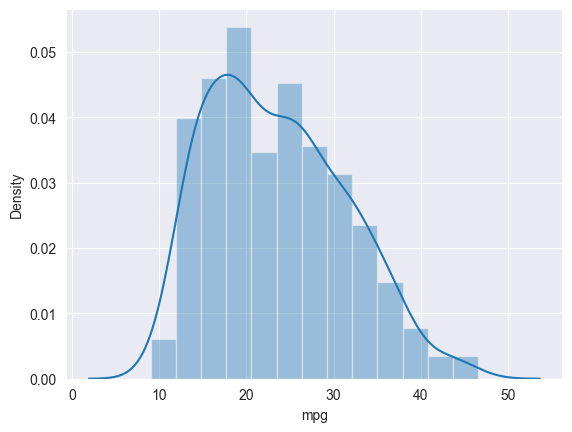

In [117]:
sns_plot = sns.distplot(df_cars["mpg"])

In [144]:
def histplot(df, title=None, kde=True, stat="density", kde_kws=dict(cut=3), alpha=.4, edgecolor=(1, 1, 1, .4), **kwargs):
    sns.histplot(df,
                 kde=kde,
                 stat=stat,
                 kde_kws=kde_kws,
                 alpha=alpha, edgecolor=edgecolor,
                 **kwargs)
    if title is not None:
        plt.title(title)

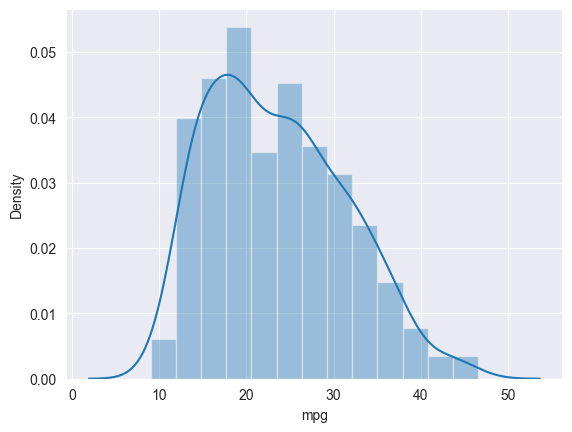

In [142]:
histplot(df_cars["mpg"])

As we can see, the distribution of mpg is not normal, but skewed to the right (which is why we had a positive skewness).
Also, it is less 'peaky' than a Normal distribution, which is why we had a negative excess kurtosis.

# [Bivariate Analysis](https://en.wikipedia.org/wiki/Bivariate_analysis)
It is one of the simplest forms of quantitative (statistical) analysis.
It involves the analysis of two variables, for the purpose of determining the empirical relationship between them.

Bivariate analysis can be helpful in testing simple hypotheses of association. It can help determine to what extent it becomes easier to know and predict a value for one variable (possibly a dependent variable) if we know the value of the other variable.

## Categorical Variables

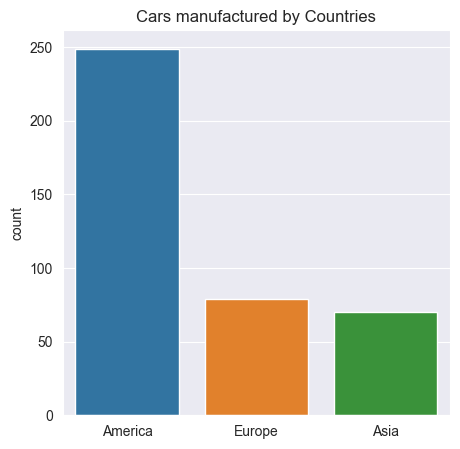

In [147]:
fig, ax = plt.subplots(figsize = (5, 5))
sns.countplot(x = df_cars.origin.values, data=df_cars)
labels = [item.get_text() for item in ax.get_xticklabels()]
labels[:3] = ['America', 'Europe', 'Asia']
ax.set_xticklabels(labels)
ax.set_title("Cars manufactured by Countries")
plt.show();

## Numerical Variables range and distribution

A [box plot](https://seaborn.pydata.org/generated/seaborn.boxplot.html) (or box-and-whisker plot) shows the distribution of quantitative data in a way that facilitates comparisons between variables or across levels of a categorical variable. The box shows the quartiles of the dataset while the whiskers extend to show the rest of the distribution, except for points that are determined to be “outliers” using a method that is a function of the inter-quartile range.

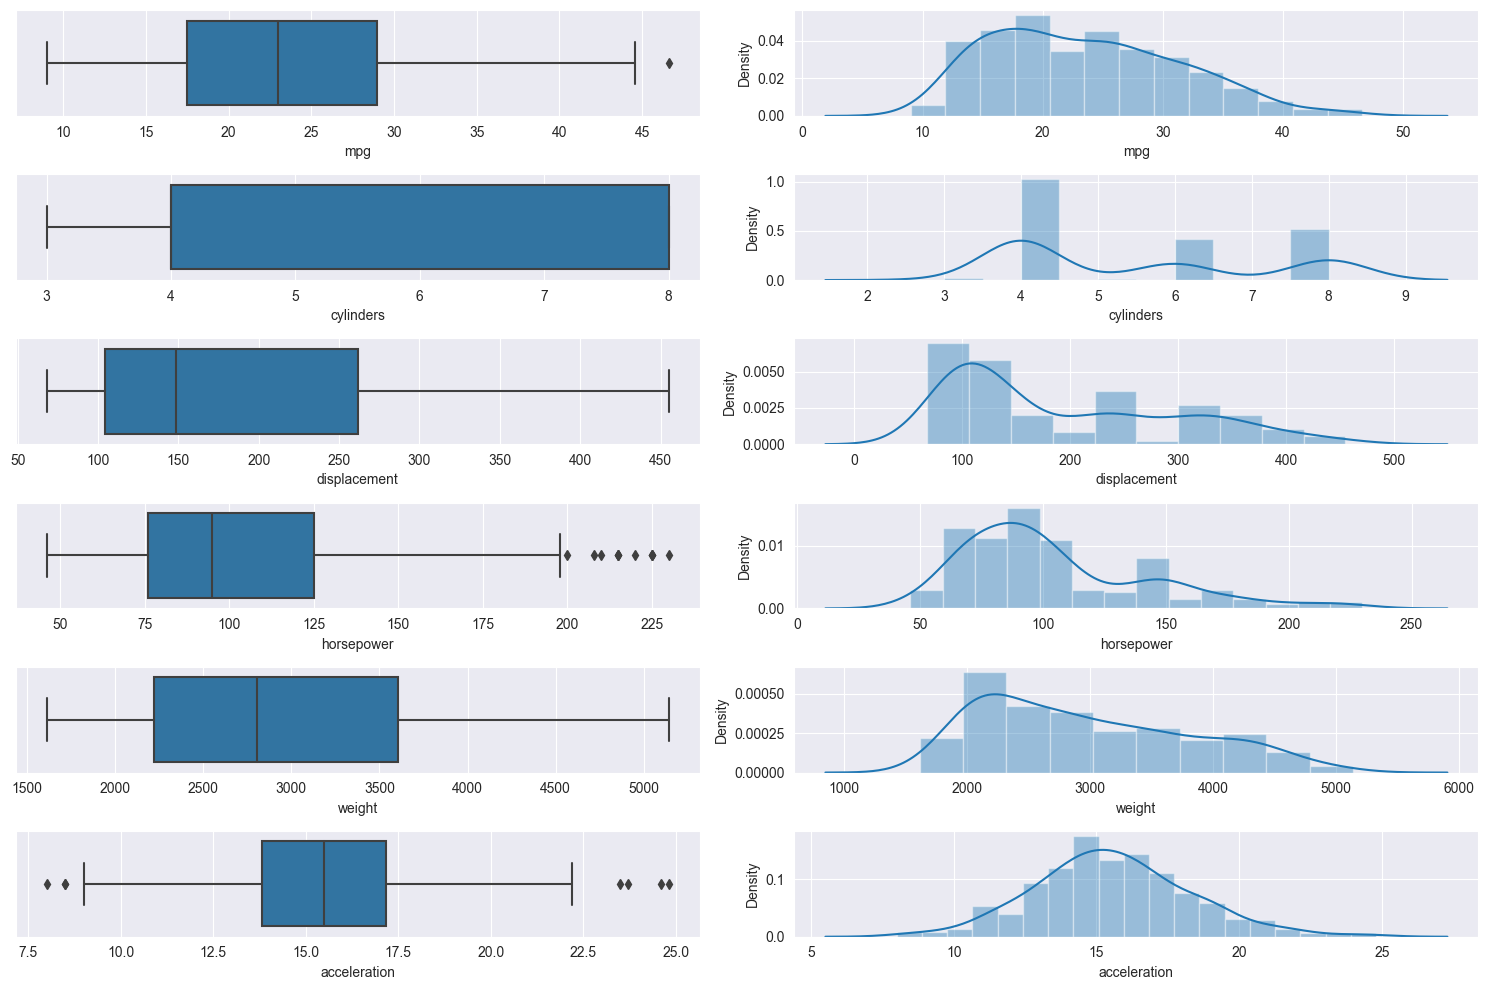

In [146]:
fig, ax = plt.subplots(6, 2, figsize = (15, 10))
sns.boxplot(x= df_cars["mpg"], ax = ax[0,0])
histplot(df_cars['mpg'], ax = ax[0,1])
sns.boxplot(x= df_cars["cylinders"], ax = ax[1,0])
histplot(df_cars['cylinders'], ax = ax[1,1])
sns.boxplot(x= df_cars["displacement"], ax = ax[2,0])
histplot(df_cars['displacement'], ax = ax[2,1])
sns.boxplot(x= df_cars["horsepower"], ax = ax[3,0])
histplot(df_cars['horsepower'], ax = ax[3,1])
sns.boxplot(x= df_cars["weight"], ax = ax[4,0])
histplot(df_cars['weight'], ax = ax[4,1])
sns.boxplot(x= df_cars["acceleration"], ax = ax[5,0])
histplot(df_cars['acceleration'], ax = ax[5,1])
plt.tight_layout();

## Plot the numerical variables
Scatter Plots help to visualize the relationship between two continuous variables.
The pattern of the spread of points can indicate whether there's a linear or non-linear correlation between the variables.

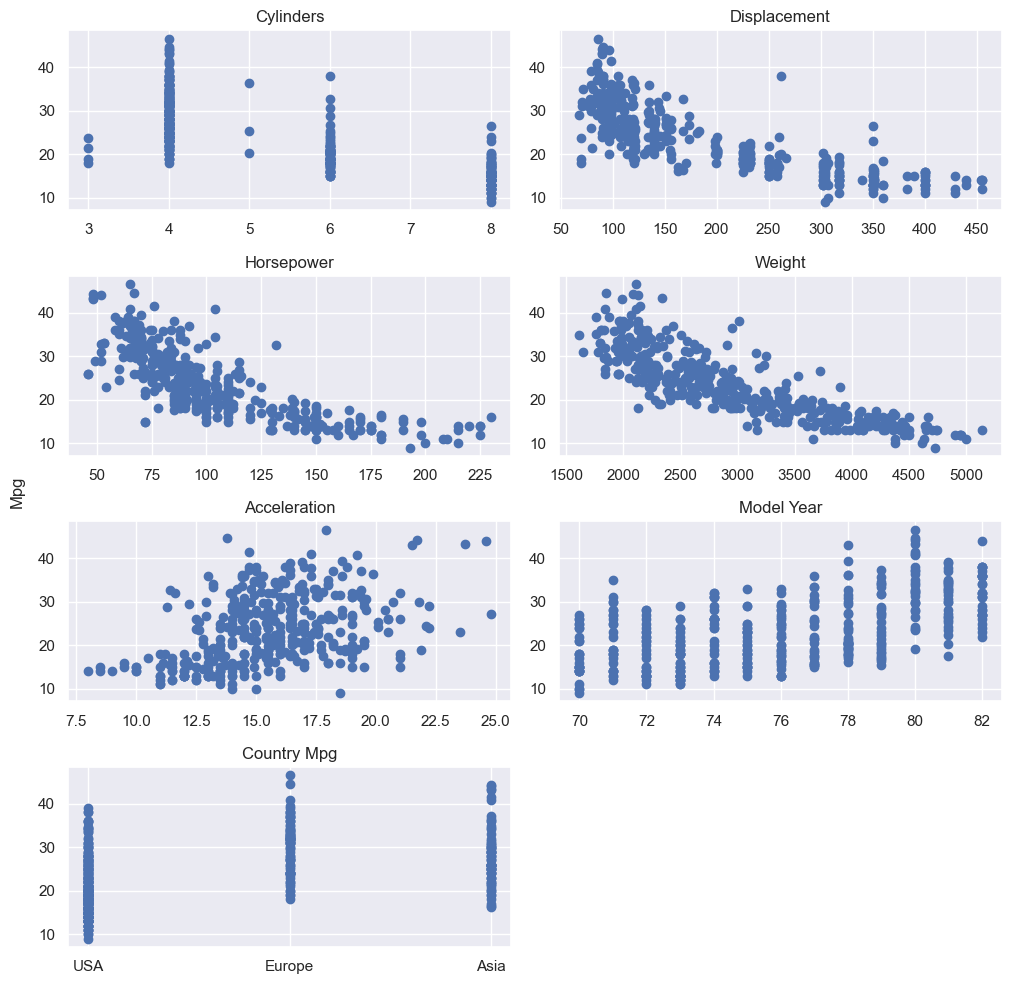

In [175]:
fig,axarr = plt.subplots(4,2, figsize=(10,10))

mpgval = df_cars.mpg.values

axarr[0,0].scatter(df_cars.cylinders.values, mpgval)
axarr[0,0].set_title('Cylinders')
axarr[0,1].scatter(df_cars.displacement.values, mpgval)
axarr[0,1].set_title('Displacement')
axarr[1,0].scatter(df_cars.horsepower.values, mpgval)
axarr[1,0].set_title('Horsepower')
axarr[1,1].scatter(df_cars.weight.values, mpgval)
axarr[1,1].set_title('Weight')
axarr[2,0].scatter(df_cars.acceleration.values, mpgval)
axarr[2,0].set_title('Acceleration')
axarr[2,1].scatter(df_cars["model year"].values, mpgval)
axarr[2,1].set_title('Model Year')
axarr[3,0].scatter(df_cars.origin.values, mpgval)
axarr[3,0].set_title('Country Mpg')

axarr[3,0].set_xticks([0,1,2])
axarr[3,0].set_xticklabels(["USA","Europe","Asia"])  # Rename x axis label as USA, Europe and Japan

axarr[3,1].axis("off")  # Removes the blank plot from the subplots
fig.text(-0.01, 0.5, 'Mpg', va='center', rotation='vertical', fontsize = 12)
plt.tight_layout()
plt.show();

## Observation

- Nobody manufactures 7-cylinder engines
- 4-cylinder engines has better mileage performance than other, and are the most manufactured
- 8-cylinder engines have a low mileage count (fast cars)
- 5-cylinder, performance-wise, between 4 and 6 cylinders.
- Displacement, weight, horsepower are inversely related to mileage.
- More horsepower means low mileage.
- Manufacturers have improved the efficiency of the engines, hence mileage increased.
- Cars manufactured in Japan focus more on mileage, but Europe is not far behind.

# MultiVariate Analysis
Here, more than two variables or features are analyzed together.
We'll use seaborn [pairplot](https://seaborn.pydata.org/generated/seaborn.pairplot.html) to plot the pairwise relationships.


In [179]:
df_cars.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130,3504,12.0,70,america
1,15.0,8,350.0,165,3693,11.5,70,america
2,18.0,8,318.0,150,3436,11.0,70,america
3,16.0,8,304.0,150,3433,12.0,70,america
4,17.0,8,302.0,140,3449,10.5,70,america


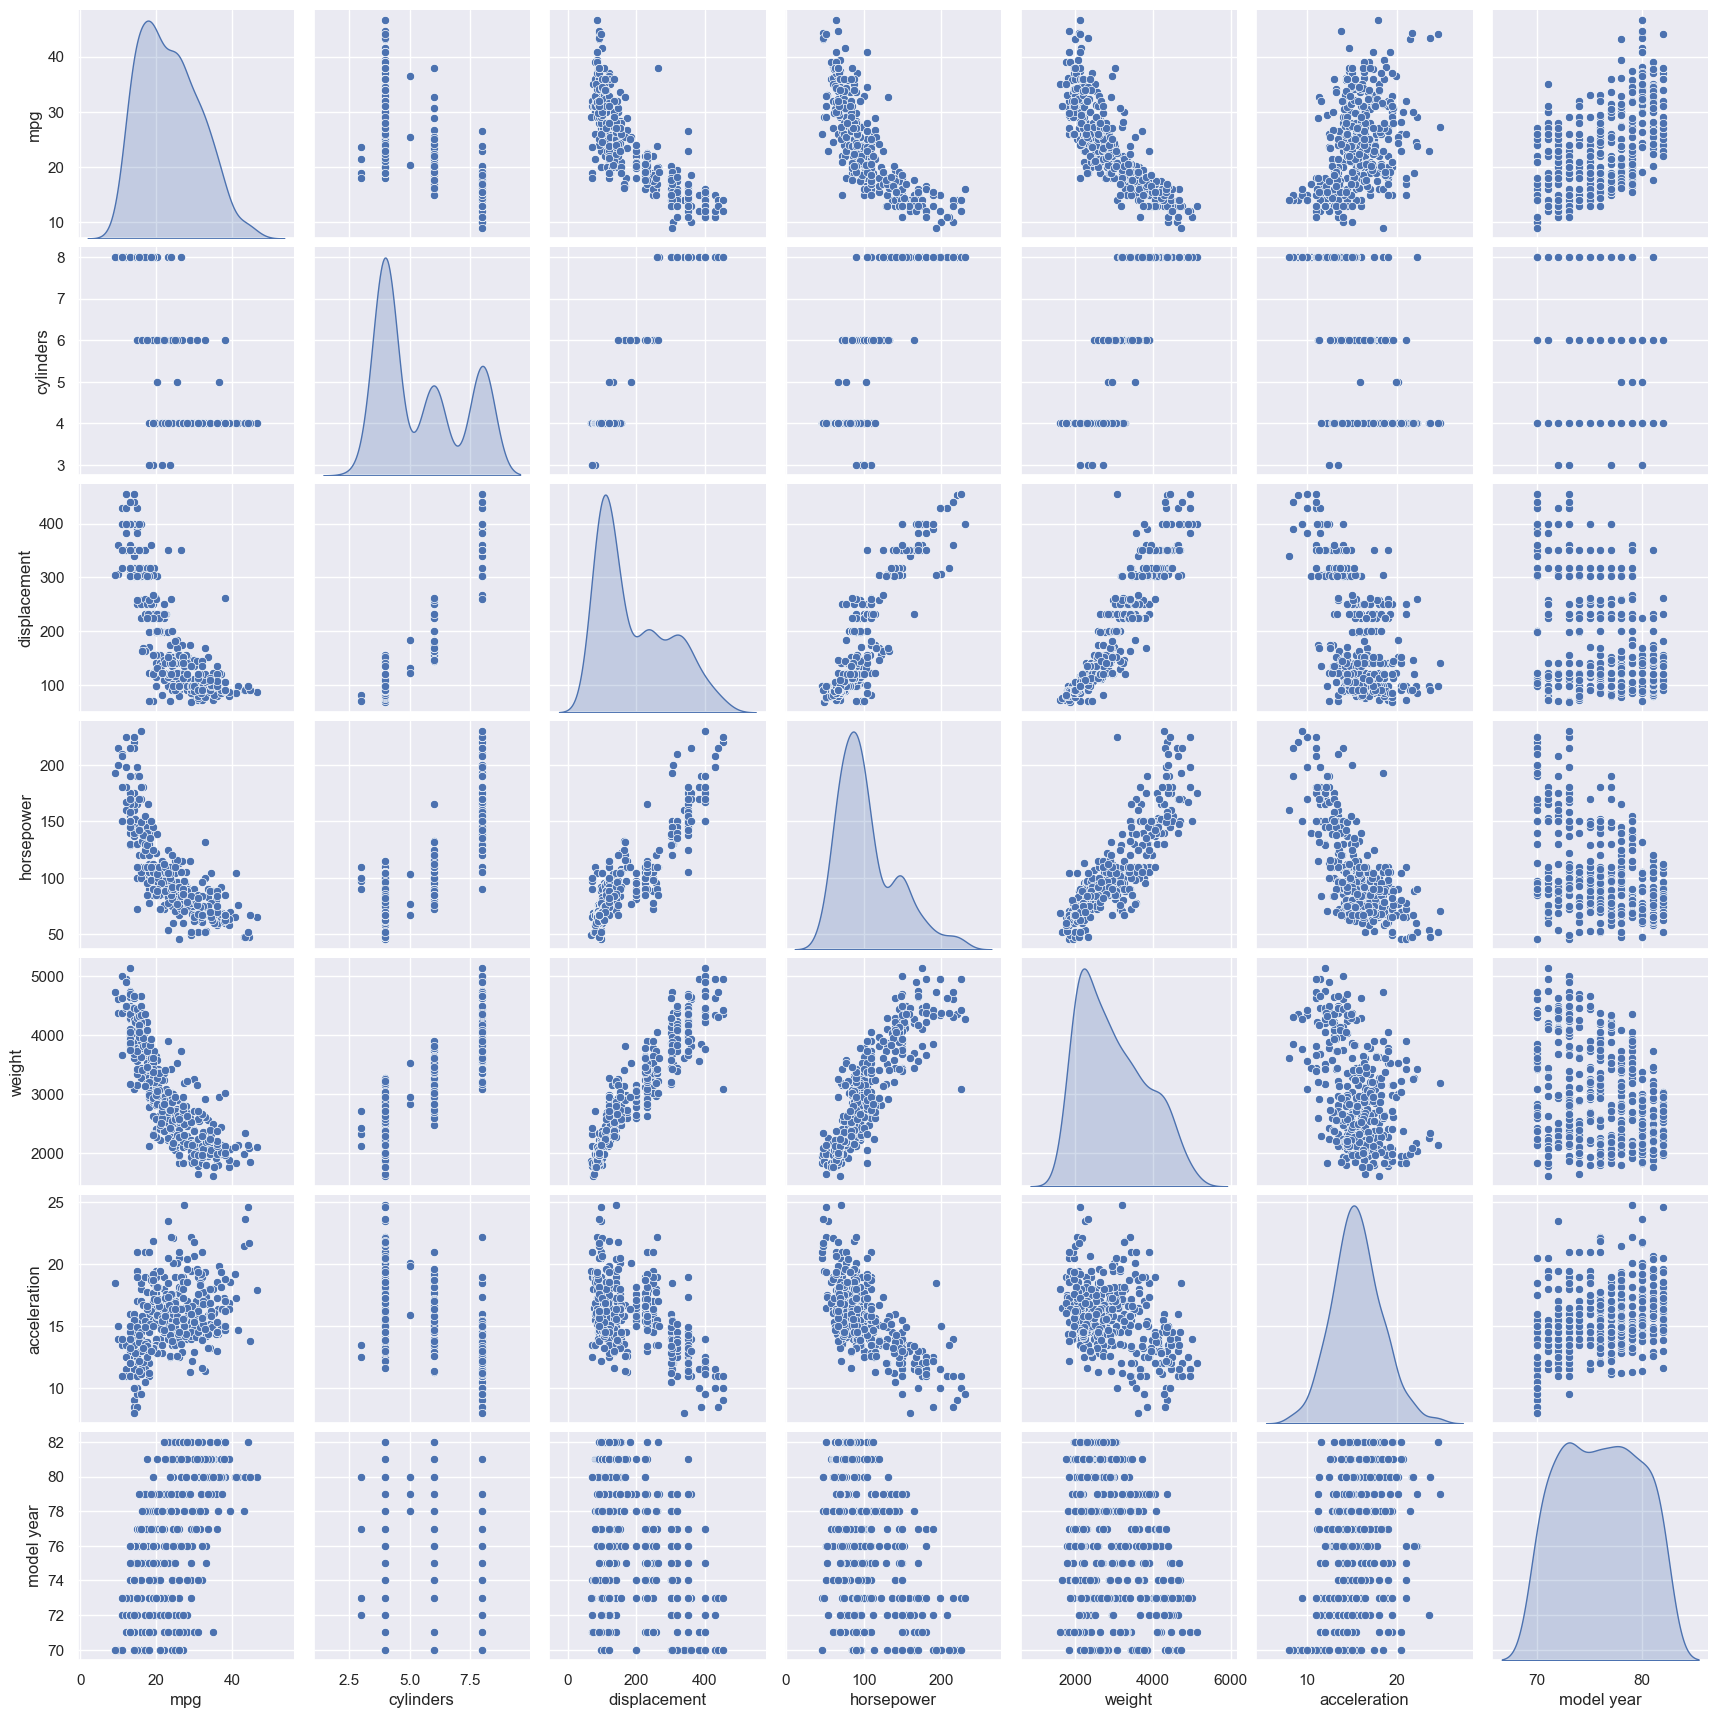

In [162]:
sns.set(rc={'figure.figsize':(12,8)})
cData_attr = df_cars.iloc[:, :8]
sns.pairplot(cData_attr, diag_kind='kde');  # gives histogram along the diagonal
# Kernel density estimation(kde) is a non-parametric way to estimate the probability density function of a random variable.


# Observation

There is a clear relation between mpg and other features but it's not linear.
Some relations seem linear, such as weight/hp or weight/displacement.
Several assumptions of classical linear regression are violated, including the assumption of no [Heteroscedasticity](https://en.wikipedia.org/wiki/Homoscedasticity_and_heteroscedasticity)(aka homogeneity of variance), ie not all variables have the same finite variance.
The existence of heteroscedasticity is a major concern in regression analysis and the analysis of variance, as it invalidates statistical tests of significance that assume that the modelling errors all have the same variance. While the ordinary least squares estimator is still unbiased in the presence of heteroscedasticity, it is inefficient and inference based on the assumption of homoskedasticity is misleading.


# Distributions of the variables/features

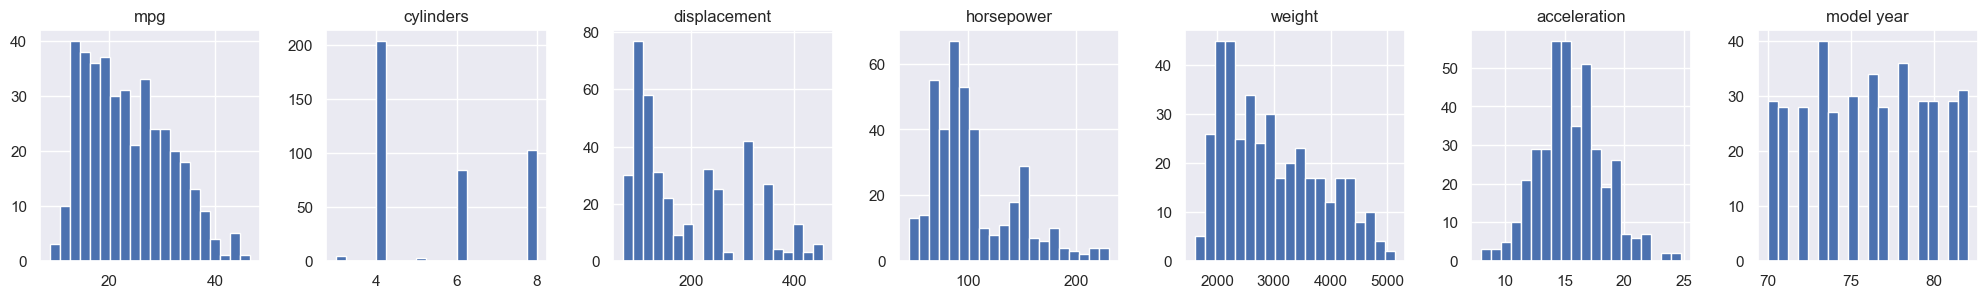

In [160]:
_, ax = plt.subplots(1, 7, figsize = (25, 3))
df_cars.hist(figsize=(12,8), bins=20, ax=ax)
plt.show();

In [22]:
print(f"Kurtosis: {df_cars['acceleration'].kurt(skipna=True):.3f}")
print(f"Percentage of cars with 4-cylinder engines: {len(df_cars[df_cars.cylinders == 4])/398:.3%}")

Kurtosis: 0.419
Percentage of cars with 4-cylinder engines: 51.256%


# Observation

The acceleration of the cars in the data is close to being normally distributed (kurtosis = 3 + 0.4 ~ 3), and the average car acceleration is 15 m/s^2.
Half the cars (51.3) have 4 cylinders.
Our output/dependent variable (mpg) is slightly skewed to the right (as we saw before).

# Correlation Heatmap
What is a [heatmap](https://blog.quantinsti.com/creating-heatmap-using-python-seaborn)?
We'll use the [heatmap](https://seaborn.pydata.org/generated/seaborn.heatmap.html) function from seaborn to plot the correlation matrix.
Dark color = negative correlation
Light color / white = positive correlation

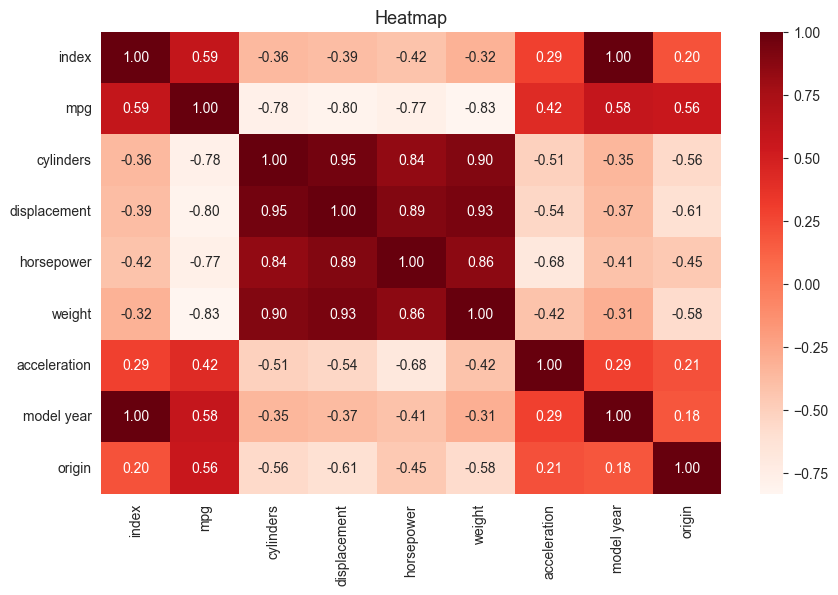

In [30]:
plt.figure(figsize=(10,6))
df_cars['origin'] = df_cars['origin'].replace({'america':1, 'europe':2, 'asia':3})
cols = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'origin']
sns.heatmap(df_cars.corr(), cmap=plt.cm.Reds, annot=True, fmt=".2f")

plt.title('Heatmap', fontsize=13)
plt.show();

# Correlation analysis

We can see that there is a relationship between the mpg variable and the other variables and this satisfies the first assumption of Linear regression.
- Strong negative correlation with displacement, horsepower, weight, cylinders.
This means that, if any of those variables in/decrease, the mpg de/increases.

- Strong positive correlations between the displacement, horsepower, weight, and cylinders.
This violates the non-multicollinearity assumption of Linear regression.

[Multicollinearity](https://www.analyticsvidhya.com/blog/2020/03/what-is-multicollinearity/#:~:text=Multicollinearity%20occurs%20when%20two%20or%20more%20independent%20variables%20have%20a,variable%20on%20the%20dependent%20variable) occurs when two or more independent variables are highly correlated with each other.
This can make it difficult to determine the effect of each individual variable on the dependent variable and can inflate the standard error of the estimate.

Multicollinearity hinders the performance and accuracy of our regression model.
To avoid this, we have to get rid of some of these variables by doing feature selection.

The other variables, acceleration, model, and origin are NOT highly correlated with each other.